# Hello World of Deep Learning - Classifying Hand Written Digits using MLP

In this notebook, we will build a Multi-layer Perceptron model to classify the hand written digits in a very famous MNIST dataset of images. 

### Getting the data

Following is the data used in this notebook: http://yann.lecun.com/exdb/mnist/

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field

In [1]:
#importing the packages
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/mnist_data/", one_hot = True)

Extracting /mnist_data/train-images-idx3-ubyte.gz
Extracting /mnist_data/train-labels-idx1-ubyte.gz
Extracting /mnist_data/t10k-images-idx3-ubyte.gz
Extracting /mnist_data/t10k-labels-idx1-ubyte.gz


Exploring the format of the data

In [2]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [3]:
type(mnist.train.images)

numpy.ndarray

In [4]:
mnist.train.images[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

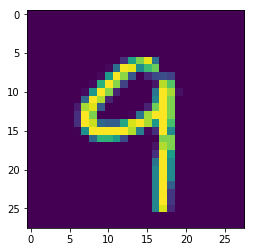

In [5]:
sample = mnist.train.images[8].reshape(28,28)
plt.imshow(sample)

### Defining Parameters

**General Parameters **

Following are the parameters we define for any deep learning model which defines the fundamental way in which it is trained and its performance. These parameters are unique for any given dataset and often we have to adjust the value of these parameters in order to get the best performance out of our model.

* Learning Rate - The rate of change we allow for our gradients and hence cost function. The more is the learning rate the bigger are the steps taken by the algorithm in the desired direction by any optimization algorithm.
* Training Epochs - Total number of times we train the network over the same data.
* Batch Size - The size of a single batch in which the training data is divided.

In [6]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

**Network Parameters **

These are the parameters that actually determine the architecture of the Neural Network we are building.

In [7]:
n_hidden_1 = 256       #no of hidden layer units in layer 1
n_hidden_2 = 256       #no of hidden layer units in layer 2
n_input = 784          #MNIST data (28pixels*28pixels)
n_classes = 10         #Total output classes
n_samples = mnist.train.num_examples      #total training examples

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### Multilayer Perceptron Model

A short description of the model that we are building:
First we receive the input data array and then to send it to the first hidden layer. Then the data will begin to have a weight attached to it  between layers, which initially, is a random value, and then sent to a node to undergo an activation function. Then it will continue on to the next hidden layer until the final output layer. We just use two hidden layer in this model. 

Once the transformed data has reached the output layer we need to evaluate it. Here we will use a loss function to evaluate how far off we are from the desired resuslt. In this case, how many classes we got correct.

Then we apply an optimization function to minimize the cost calculated in the last step. This is done by adjusting the weights across the network. In this example we are using Adam Optimizer.

We can adjust how quickly to apply to apply this optimization to the weights by changing the learning rate that we defined before. Lower the rate, higher is the possibility of accuracyand hence resolution , but slower is the process of optimization and longer it takes to get to the desired level of accuracy. The higher the rate, quicker is the optimization at the cost of resolution and we may end up diverging from the results.

The two hidden layers are using Relu activation function, which is a simple rectifier function which either returns 0 or x. Final output layer will use linear activation function.

In [8]:
def multilayer_perceptron(x, weights, biases):
    '''
    This function provides the definition of the activation functions of different layers.
    
    Arguments:
    x: Input tensor of images.
    weights: Randomly initialized weights of the network
    biases: Randomly initialized bias used along with the weights.
    
    Returns:
    Values calculated by the output layer.
    '''
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer2 = tf.nn.relu(layer_2)
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return(out_layer)    

### Weights and Bias Initialization

In order for our Tensorflow model to work, we need to create two dictionaries containing our weight and bias objects for the model. We use the tf.variable object type as this is different from a constant beacause Tensorflow's Graph Object becomes aware of the states of all the variables. A variable is a modifiable
tensor that lives in Tensorflow's graph of interacting operations. It can be used and modified by the computation. 
 
We use Tensorflow's built-in random_normal method to create random values for our weights.

In [9]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [10]:
biases = {
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes])),
}

In [11]:
#Constructing the model
pred = multilayer_perceptron(x, weights, biases)

### Defining Cost and Optimization Functions

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [13]:
#Initializing the variables
init = tf.global_variables_initializer()

### Training the model

**next_batch() **

This function returns a tuple in the form (X, y) with an array of the data and a y-array indicating the class in the form of a binary array. Example:

In [14]:
Xsamp, ysamp = mnist.train.next_batch(1)

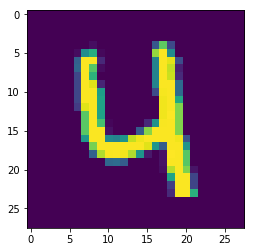

In [15]:
plt.imshow(Xsamp.reshape(28,28))

In [16]:
print(ysamp)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Running the session

We are running two loops, the outer loop runs the epochs, and the inner loop runs the batches for each epoch loop

In [17]:
#Launch the session
sess = tf.InteractiveSession()

#Initialize all the variables
sess.run(init)

#Training epochs
for epoch in range(training_epochs):
    
    #Starting with Cost = 0.0
    avg_cost = 0.0
    
    #Convert total number into batches
    total_batch = int(n_samples / batch_size)
    
    #Loop over all batches
    for i in range(total_batch):
        
        #Get the next batch of data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #Feed dictionary for optimization and loss value
        #Returns a tuple, but we need only the cost.
        _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
        
        #compute average loss
        avg_cost += c / total_batch
        
    print("Epoch: {} cost = {:.4f}".format(epoch+1, avg_cost))
    
print("Model has completed {} Epochs of training".format(training_epochs))    

Epoch: 1 cost = 244.3472
Epoch: 2 cost = 62.3130
Epoch: 3 cost = 39.7146
Epoch: 4 cost = 27.9063
Epoch: 5 cost = 20.6999
Epoch: 6 cost = 15.8351
Epoch: 7 cost = 12.5259
Epoch: 8 cost = 10.0443
Epoch: 9 cost = 8.6843
Epoch: 10 cost = 6.7937
Epoch: 11 cost = 5.5356
Epoch: 12 cost = 4.7222
Epoch: 13 cost = 4.0170
Epoch: 14 cost = 3.3891
Epoch: 15 cost = 2.8537
Model has completed 15 Epochs of training


### Model Evaluations

Tensorflow comes with some in-built functions to help evaluate the model, like, tf.equal, tf.cast and tf.reduce_mean

**tf.equal() **

This is essentially just a check of predictions == y_test. In this case since we know the format of the labels is a 1 in an array of zeros, we can argmax() location of that 1. Remember that y is still that placeholder we created at the very beginning, we will perform a series of operations to get a tensor that we can eventually fill in the test data for with an evaluation method.

In [18]:
#Test Model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))

In [19]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In order to get a numerical value for our predictions we will need to use tf.cast to cast the Tensor of booleans back into a Tensor of floating point values in order to take the mean of it.

In [20]:
correct_predictions = tf.cast(correct_predictions, "float")

In [21]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


Now we use tf.reduce_mean() in order to grab the mean of the elements across the tensor.

In [22]:
accuracy = tf.reduce_mean(correct_predictions)

In [23]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

This accuracy is still a Tensor object. We still need to pass in our actual test data. Now we call the mnist test labels and images and evaluate our accuracy!

In [24]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The eval() method allows us to directly evaluate this tensor in a Session without needing to call tf.Sess()

In [26]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9495


A basic MLP classifier is able to achieve ~95% accuracy. This can be increased by increasing the total hidden layers, but this will also lead to increase in run time of the model training. Other way to increase the accuracy of the model is to increase the total number of epochs. 

### End of Document